In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Создание массива данных
dataResist = {
    'Месяц': ['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль'],
    'Операция 1 кол': [500, 550, 600, 650, 700, 720, 720],
    'Операция 2 кол': [500, 20, 500, 500, 40, 500, 40],
    'Операция 3 кол': [500, 200, 400, 20, 40, 500, 50],
    'Операция 4 кол': [500, 300, 100, 30, 40, 500, 40],
    'Операция 1 мин на операцию': [2.1, 0, 2, 1, 5.2, 3.2, 3.5],
    'Операция 2 мин на операцию': [2.2, 0, 1, 1, 5.5, 3.4, 3.6],
    'Операция 3 мин на операцию': [3.1, 0, 2, 1, 5.5, 3.5, 3.8],
    'Операция 4 мин на операцию': [2.5, 5, 0, 2, 0.5, 4.1, 3.9],
    'Число дней': [20, 20, 22, 21, 23, 20, 3.5],
    'Общее время работы (часы)': [1000, 1050, 1100, 1120, 1150, 1180, 1200],
    'Количество сотрудников': [30, 32, 31, 33, 35, 34, 35],
    'Нагрузка подразделения': [0.85, 0.88, 0.92, 0.90, 0.94, 0.91, 0.92]
}

# Преобразование в DataFrame
dfresist = pd.DataFrame(dataResist)

# Создание дамми-переменных для месяцев
dfresist = pd.get_dummies(dfresist, columns=['Месяц'])

# Подготовка данных
X = dfresist.drop(['Нагрузка подразделения'], axis=1)
y = dfresist['Нагрузка подразделения']

# Создание и обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Важность признаков
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Вывод важности признаков
print("Важность признаков:")
print(feature_importance.sort_values(by='Importance', ascending=False))



def predictValueNewMonth(dataResist):
    # Подготовка данных для операции
    X = np.array(range(len(dataResist))).reshape(-1, 1)  # Индексы месяцев
    y = np.array(dataResist)  # Количество операций

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X, y)

    # Предсказание для следующего месяца
    predicted_next_month = model.predict([[len(dataResist)]])
    return predicted_next_month[0]


data_july = {
    'Операция 1 кол': predictValueNewMonth(dfresist['Операция 1 кол']),
    'Операция 2 кол': predictValueNewMonth(dfresist['Операция 2 кол']),
    'Операция 3 кол': predictValueNewMonth(dfresist['Операция 3 кол']),
    'Операция 4 кол': predictValueNewMonth(dfresist['Операция 4 кол']),
    'Операция 1 мин на операцию': dfresist['Операция 1 мин на операцию'][-3:].median(),
    'Операция 2 мин на операцию': dfresist['Операция 2 мин на операцию'][-3:].median(),
    'Операция 3 мин на операцию': dfresist['Операция 3 мин на операцию'][-3:].median(),
    'Операция 4 мин на операцию': dfresist['Операция 4 мин на операцию'][-3:].median(),
    'Число дней': 20,
    'Общее время работы (часы)': 1120,
    'Количество сотрудников': 33,
}

# Преобразование в DataFrame
df_july = pd.DataFrame(data_july, index=[0])
df_july

# Добавление дамми-переменных для месяцев
for col in dfresist.columns:
    if col not in df_july.columns:
        df_july[col] = 0

# Предсказание нагрузки для июля
df_july = df_july.drop(['Нагрузка подразделения'], axis=1)

# Predict the load for July
predicted_load_july = model.predict(df_july)
print("Предсказанное значение нагрузки для июля:", predicted_load_july[0])
df_july



Важность признаков:
                       Feature  Importance
9    Общее время работы (часы)    0.187446
0               Операция 1 кол    0.152980
4   Операция 1 мин на операцию    0.090334
10      Количество сотрудников    0.089815
6   Операция 3 мин на операцию    0.085145
3               Операция 4 кол    0.075816
17                   Месяц_Янв    0.054930
8                   Число дней    0.046873
5   Операция 2 мин на операцию    0.045291
7   Операция 4 мин на операцию    0.039362
2               Операция 3 кол    0.039258
1               Операция 2 кол    0.035899
16                   Месяц_Фев    0.026769
11                   Месяц_Апр    0.019940
14                   Месяц_Май    0.004977
15                  Месяц_Март    0.002978
13                  Месяц_Июнь    0.001750
12                  Месяц_Июль    0.000435
Предсказанное значение нагрузки для июля: 0.9154000000000001


,Операция 1 кол,Операция 2 кол,Операция 3 кол,Операция 4 кол,Операция 1 мин на операцию,Операция 2 мин на операцию,Операция 3 мин на операцию,Операция 4 мин на операцию,Число дней,Общее время работы (часы),Количество сотрудников,Месяц_Апр,Месяц_Июль,Месяц_Июнь,Месяц_Май,Месяц_Март,Месяц_Фев,Месяц_Янв
0,791.428571,174.285714,85.714286,67.142857,3.5,3.6,3.8,3.9,20,1120,33,0,0,0,0,0,0,0


d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


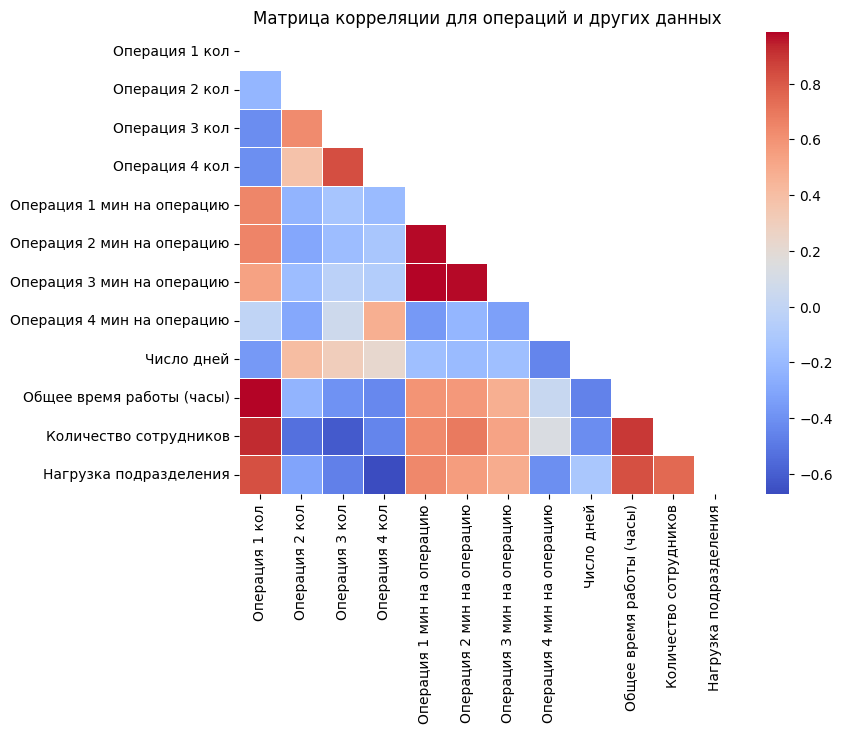

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


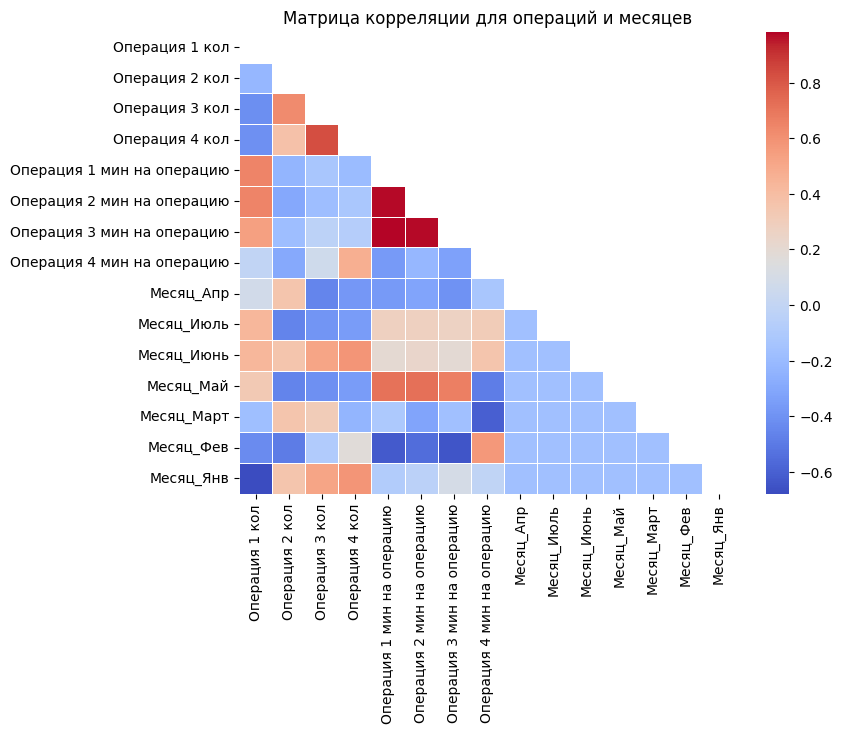

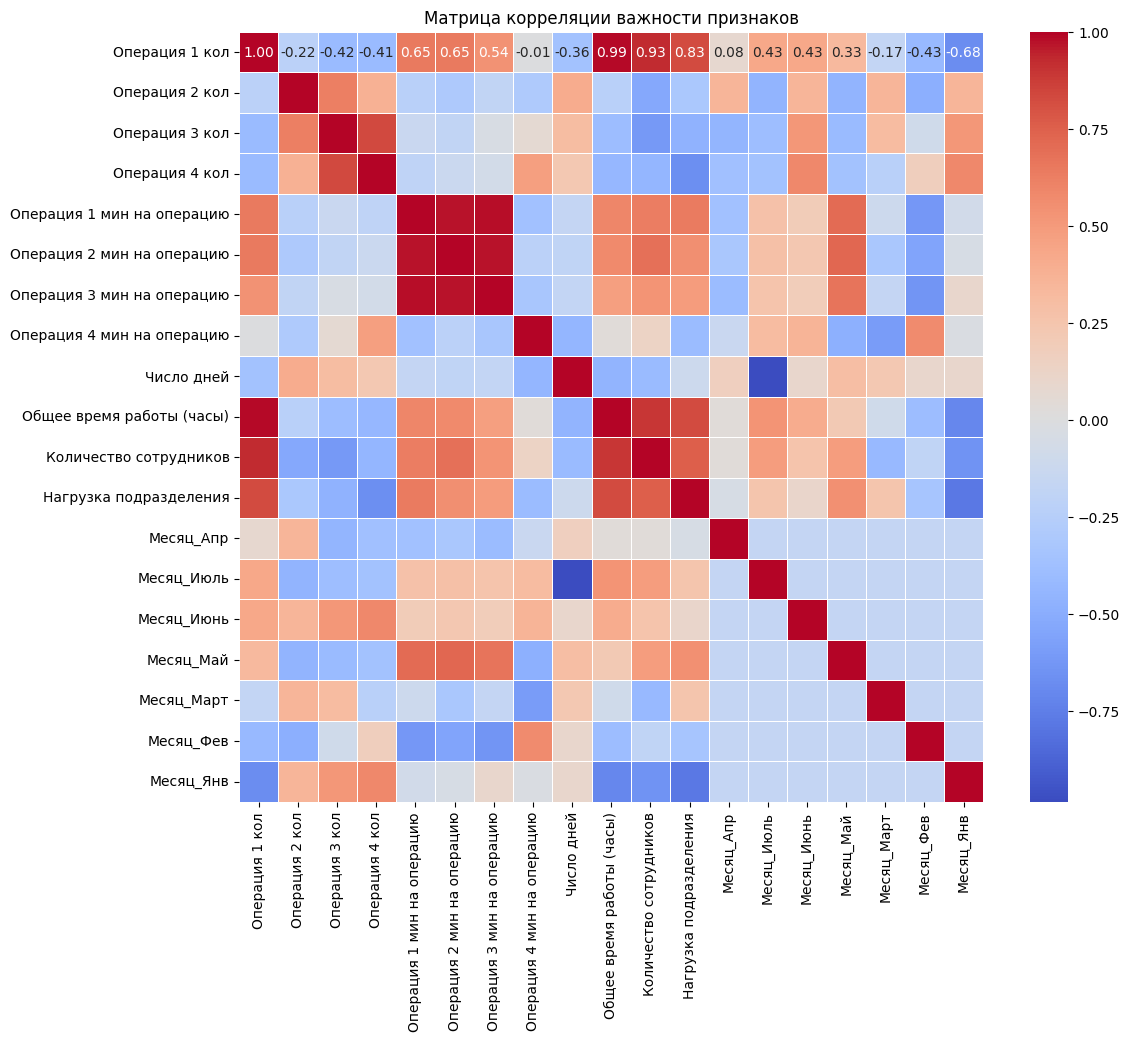

In [2]:


# Extracting correlation sub-matrices for different groups of features
month_cols = [col for col in dfresist.columns if col.startswith('Месяц')]
operation_cols = [col for col in dfresist.columns if col.startswith('Операция')]
other_cols = [col for col in dfresist.columns if col not in month_cols + operation_cols]

# Correlation matrix for months
month_correlation_matrix = dfresist[month_cols].corr()

# Correlation matrix for operations and other data
operation_and_other_correlation_matrix = dfresist[operation_cols + other_cols].corr()

# Correlation matrix for operations and months
operation_and_month_correlation_matrix = dfresist[operation_cols + month_cols].corr()

# Function to plot half of the correlation matrix
def plot_half_correlation_matrix(correlation_matrix, title):
    # Create a mask to hide the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
    plt.title(title)
    plt.show()

# Plot half of the correlation matrix for operations and other data
plot_half_correlation_matrix(operation_and_other_correlation_matrix, 'Матрица корреляции для операций и других данных')

# Plot half of the correlation matrix for operations and months
plot_half_correlation_matrix(operation_and_month_correlation_matrix, 'Матрица корреляции для операций и месяцев')



# Построение матрицы корреляции
correlation_matrix = dfresist.corr()

# Визуализация матрицы корреляции важности признаков
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции важности признаков')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности модели
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: -10.02124444444463


In [10]:
import datetime

date = datetime.datetime.strptime("2000-01-12", "%Y-%m-%d")

date

datetime.datetime(2000, 1, 12, 0, 0)